In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

In [11]:
df = pd.read_csv(r'C:\Users\mohit\OneDrive\Desktop\omdena-texas-homelessness\src\data\housing\HOSUING_cost_burden.xlsx - Sheet1.csv')

In [12]:
df.head()

,#ERROR!,Metropolitan Area,Cost Burdened Renter Share (%),Severely Burdened Renter Share (%),Cost Burdened Owner Share (%),Severely Burdened Owner Share (%),Moderately Burdened Renter Households,Severely Burdened Renter Households,Total Burdened Renter Households,Number of Renter Households,Moderately Burdened Owner Households,Severely Burdened Owner Households,Total Burdened Owner Households,Number of Owner Households,Median Income of Renter Households,Median Income of Owner Households,Median Monthly Housing Cost of Renter Households,Median Monthly Housing Cost of Owner Households
0,1,"New York-Newark-Jersey City, NY-NJ-PA",52.5,29.9,36.1,17.1,"792,800","1,044,600","1,837,500","3,498,000","690,200","620,900","1,311,100","3,627,700","$43,500","$100,000","$1,300","$2,020"
1,2,"Los Angeles-Long Beach-Anaheim, CA",57.1,31.0,35.7,16.7,"586,500","695,500","1,282,000","2,244,800","393,600","344,900","738,500","2,070,900","$44,000","$91,950","$1,354","$1,883"
2,3,"Chicago-Naperville-Elgin, IL-IN-WI",50.3,27.9,27.8,12.1,"284,900","355,700","640,700","1,273,800","345,900","265,000","610,900","2,197,000","$37,000","$83,000","$1,010","$1,415"
3,4,"Dallas-Fort Worth-Arlington, TX",45.9,22.7,22.3,8.6,"234,800","229,300","464,000","1,010,000","201,000","127,000","328,000","1,470,300","$40,100","$81,000",$990,"$1,252"
4,5,"Houston-The Woodlands-Sugar Land, TX",46.7,24.2,20.5,8.8,"211,700","227,800","439,400","940,700","158,800","118,500","277,200","1,352,900","$39,600","$84,000",$980,"$1,204"


In [13]:
df.isnull().sum()

#ERROR!                                             0
Metropolitan Area                                   0
Cost Burdened Renter Share (%)                      0
Severely Burdened Renter Share (%)                  0
Cost Burdened Owner Share (%)                       0
Severely Burdened Owner Share (%)                   0
Moderately Burdened Renter Households               0
Severely Burdened Renter Households                 0
Total Burdened Renter Households                    0
Number of Renter Households                         0
Moderately Burdened Owner Households                0
Severely Burdened Owner Households                  0
Total Burdened Owner Households                     0
Number of Owner Households                          0
Median Income of Renter Households                  0
Median Income of Owner Households                   0
Median Monthly Housing Cost of Renter Households    0
Median Monthly Housing Cost of Owner Households     0
dtype: int64

In [14]:
df.nunique()

#ERROR!                                             100
Metropolitan Area                                   100
Cost Burdened Renter Share (%)                       74
Severely Burdened Renter Share (%)                   68
Cost Burdened Owner Share (%)                        73
Severely Burdened Owner Share (%)                    56
Moderately Burdened Renter Households                93
Severely Burdened Renter Households                  98
Total Burdened Renter Households                     98
Number of Renter Households                          99
Moderately Burdened Owner Households                 94
Severely Burdened Owner Households                   91
Total Burdened Owner Households                      97
Number of Owner Households                           98
Median Income of Renter Households                   59
Median Income of Owner Households                    78
Median Monthly Housing Cost of Renter Households     70
Median Monthly Housing Cost of Owner Households 

In [15]:
df.shape

(100, 18)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   #ERROR!                                           100 non-null    int64  
 1   Metropolitan Area                                 100 non-null    object 
 2   Cost Burdened Renter Share (%)                    100 non-null    float64
 3   Severely Burdened Renter Share (%)                100 non-null    float64
 4   Cost Burdened Owner Share (%)                     100 non-null    float64
 5   Severely Burdened Owner Share (%)                 100 non-null    float64
 6   Moderately Burdened Renter Households             100 non-null    object 
 7   Severely Burdened Renter Households               100 non-null    object 
 8   Total Burdened Renter Households                  100 non-null    object 
 9   Number of Renter House

# Let's Remove Dollar Sign

In [24]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","$"]
# col = ['Per Capita Income','Total Personal Income','Median Household Income','Average Annual Pay']

col = df.select_dtypes('object').columns

for i in range(len(spec_chars)):
    for j in range(len(col)):
        df[col[j]] = df[col[j]].str.replace(spec_chars[i] , "")

In [25]:
col

Index(['Metropolitan Area', 'Moderately Burdened Renter Households',
       'Severely Burdened Renter Households',
       'Total Burdened Renter Households', 'Number of Renter Households',
       'Moderately Burdened Owner Households',
       'Severely Burdened Owner Households', 'Total Burdened Owner Households',
       'Number of Owner Households', 'Median Income of Renter Households',
       'Median Income of Owner Households',
       'Median Monthly Housing Cost of Renter Households',
       'Median Monthly Housing Cost of Owner Households'],
      dtype='object')

In [26]:
df.head()

,#ERROR!,Metropolitan Area,Cost Burdened Renter Share (%),Severely Burdened Renter Share (%),Cost Burdened Owner Share (%),Severely Burdened Owner Share (%),Moderately Burdened Renter Households,Severely Burdened Renter Households,Total Burdened Renter Households,Number of Renter Households,Moderately Burdened Owner Households,Severely Burdened Owner Households,Total Burdened Owner Households,Number of Owner Households,Median Income of Renter Households,Median Income of Owner Households,Median Monthly Housing Cost of Renter Households,Median Monthly Housing Cost of Owner Households
0,1,New YorkNewarkJersey City NYNJPA,52.5,29.9,36.1,17.1,792800,1044600,1837500,3498000,690200,620900,1311100,3627700,43500,100000,1300,2020
1,2,Los AngelesLong BeachAnaheim CA,57.1,31.0,35.7,16.7,586500,695500,1282000,2244800,393600,344900,738500,2070900,44000,91950,1354,1883
2,3,ChicagoNapervilleElgin ILINWI,50.3,27.9,27.8,12.1,284900,355700,640700,1273800,345900,265000,610900,2197000,37000,83000,1010,1415
3,4,DallasFort WorthArlington TX,45.9,22.7,22.3,8.6,234800,229300,464000,1010000,201000,127000,328000,1470300,40100,81000,990,1252
4,5,HoustonThe WoodlandsSugar Land TX,46.7,24.2,20.5,8.8,211700,227800,439400,940700,158800,118500,277200,1352900,39600,84000,980,1204


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   #ERROR!                                           100 non-null    int64  
 1   Metropolitan Area                                 100 non-null    object 
 2   Cost Burdened Renter Share (%)                    100 non-null    float64
 3   Severely Burdened Renter Share (%)                100 non-null    float64
 4   Cost Burdened Owner Share (%)                     100 non-null    float64
 5   Severely Burdened Owner Share (%)                 100 non-null    float64
 6   Moderately Burdened Renter Households             100 non-null    object 
 7   Severely Burdened Renter Households               100 non-null    object 
 8   Total Burdened Renter Households                  100 non-null    object 
 9   Number of Renter House

# Now let's Change the Wrong Datatype also

In [28]:
col  = df.columns

In [29]:
col = df.columns

for i in range(6,18):
    df[col[i]] = pd.to_numeric(df[col[i]], errors='coerce')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   #ERROR!                                           100 non-null    int64  
 1   Metropolitan Area                                 100 non-null    object 
 2   Cost Burdened Renter Share (%)                    100 non-null    float64
 3   Severely Burdened Renter Share (%)                100 non-null    float64
 4   Cost Burdened Owner Share (%)                     100 non-null    float64
 5   Severely Burdened Owner Share (%)                 100 non-null    float64
 6   Moderately Burdened Renter Households             100 non-null    int64  
 7   Severely Burdened Renter Households               100 non-null    int64  
 8   Total Burdened Renter Households                  100 non-null    int64  
 9   Number of Renter House

# Let's Do EDA

In [31]:
categorical_eda(df)


To check: 
Unique count of non-numeric data

Metropolitan Area    100
dtype: int64
Top 5 unique values of Metropolitan Area
                  Metropolitan Area  Count
0  New YorkNewarkJersey City NYNJPA      1
1                      Knoxville TN      1
2           GreensboroHigh Point NC      1
3    North PortSarasotaBradenton FL      1
4                         Dayton OH      1
 


In [34]:
top5(df)

Top 5 unique values of Metropolitan Area
                  Metropolitan Area  Count
0  New YorkNewarkJersey City NYNJPA      1
1                      Knoxville TN      1
2           GreensboroHigh Point NC      1
3    North PortSarasotaBradenton FL      1
4                         Dayton OH      1
 


In [35]:
col = df.columns

# Heatmap

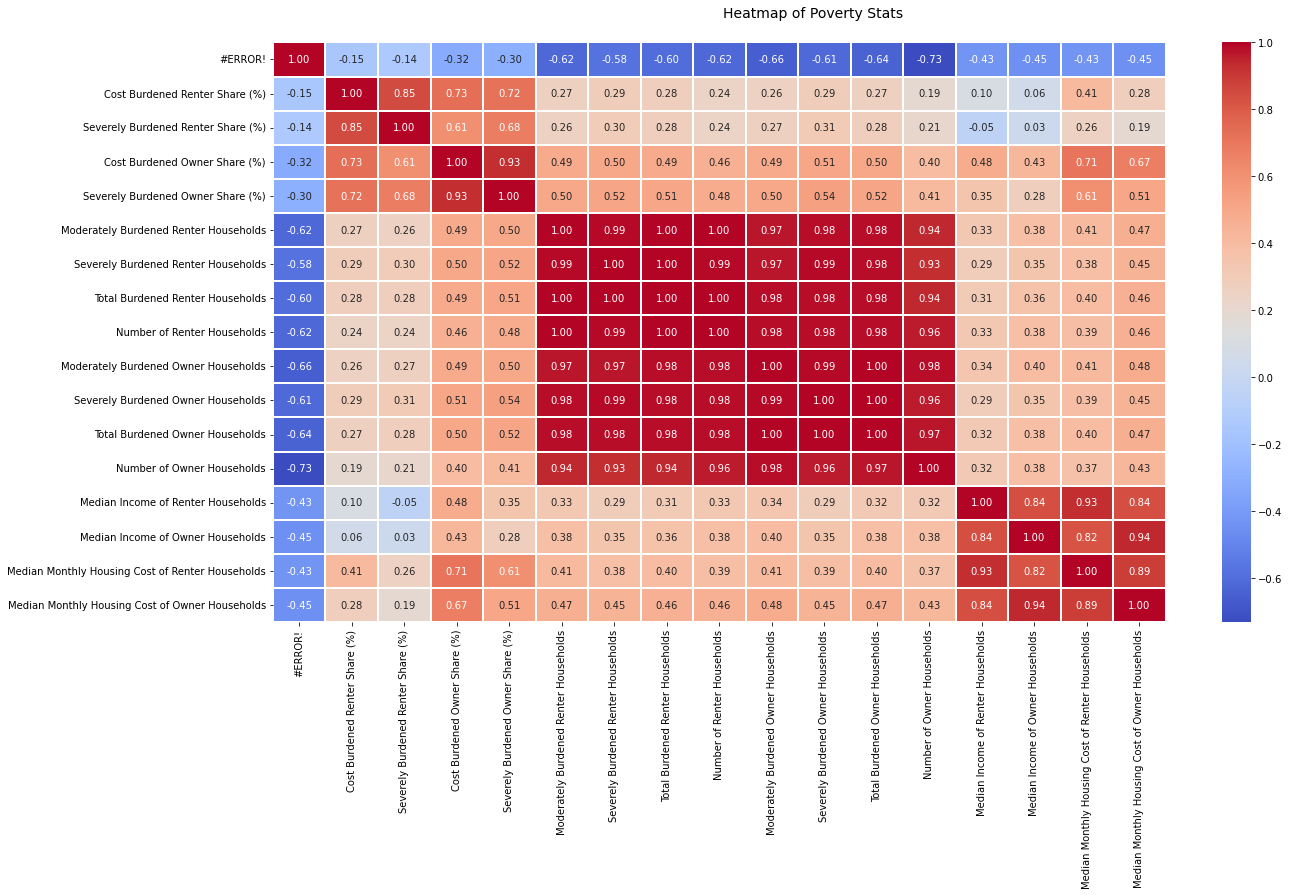

In [38]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(20, 10))
corr = df[col].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heatmap of Poverty Stats', fontsize=14)

# Correlation

In [39]:
corr = df.corr()

In [40]:
corr

,#ERROR!,Cost Burdened Renter Share (%),Severely Burdened Renter Share (%),Cost Burdened Owner Share (%),Severely Burdened Owner Share (%),Moderately Burdened Renter Households,Severely Burdened Renter Households,Total Burdened Renter Households,Number of Renter Households,Moderately Burdened Owner Households,Severely Burdened Owner Households,Total Burdened Owner Households,Number of Owner Households,Median Income of Renter Households,Median Income of Owner Households,Median Monthly Housing Cost of Renter Households,Median Monthly Housing Cost of Owner Households
#ERROR!,1.000000,-0.148997,-0.139924,-0.318508,-0.301954,-0.622090,-0.580210,-0.599645,-0.624227,-0.663995,-0.609622,-0.640180,-0.730454,-0.430288,-0.453492,-0.434772,-0.447118
Cost Burdened Renter Share (%),-0.148997,1.000000,0.847924,0.733722,0.722715,0.273305,0.289781,0.282832,0.235983,0.258948,0.290050,0.273868,0.188412,0.102742,0.060787,0.412641,0.280911
Severely Burdened Renter Share (%),-0.139924,0.847924,1.000000,0.610943,0.675029,0.258555,0.299709,0.281780,0.239535,0.265060,0.305247,0.284195,0.205937,-0.046627,0.030372,0.263140,0.191662
Cost Burdened Owner Share (%),-0.318508,0.733722,0.610943,1.000000,0.930439,0.488930,0.495813,0.493436,0.462891,0.493798,0.511902,0.503197,0.396404,0.475194,0.428473,0.714557,0.673224
Severely Burdened Owner Share (%),-0.301954,0.722715,0.675029,0.930439,1.000000,0.501528,0.517051,0.510860,0.477364,0.498001,0.539791,0.518372,0.412841,0.351593,0.275856,0.610727,0.512277
Moderately Burdened Renter Households,-0.622090,0.273305,0.258555,0.488930,0.501528,1.000000,0.994389,0.998264,0.996819,0.974730,0.977602,0.978089,0.944896,0.330610,0.375666,0.410099,0.466765
Severely Burdened Renter Households,-0.580210,0.289781,0.299709,0.495813,0.517051,0.994389,1.000000,0.998893,0.993791,0.973654,0.986192,0.981490,0.934347,0.288942,0.347133,0.382324,0.445650
Total Burdened Renter Households,-0.599645,0.282832,0.281780,0.493436,0.510860,0.998264,0.998893,1.000000,0.996517,0.975485,0.983744,0.981342,0.940336,0.307881,0.360331,0.395212,0.455683
Number of Renter Households,-0.624227,0.235983,0.239535,0.462891,0.477364,0.996819,0.993791,0.996517,1.000000,0.981400,0.982715,0.984053,0.956447,0.325238,0.380991,0.394194,0.460433
Moderately Burdened Owner Households,-0.663995,0.258948,0.265060,0.493798,0.498001,0.974730,0.973654,0.975485,0.981400,1.000000,0.991639,0.998211,0.982521,0.336054,0.399232,0.414408,0.479759


In [41]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

df.drop(to_drop, axis=1, inplace=True)

In [42]:
df.shape

(100, 11)

# Numerical EDA


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
#ERROR!,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
Cost Burdened Renter Share (%),100.0,48.198,4.285187,39.1,45.400,47.60,50.350,61.5
Severely Burdened Renter Share (%),100.0,25.273,3.259790,18.4,23.000,24.85,27.700,35.4
Cost Burdened Owner Share (%),100.0,23.651,4.563569,17.5,20.325,22.85,26.400,36.1
Severely Burdened Owner Share (%),100.0,9.909,2.435101,5.0,8.075,9.50,11.225,17.1
Moderately Burdened Renter Households,100.0,70948.000,106107.975766,10600.0,21875.000,32650.00,75450.000,792800.0
Median Income of Renter Households,100.0,35785.600,8207.236437,24400.0,30000.000,35000.00,38375.000,76500.0
Median Income of Owner Households,100.0,74457.400,15173.720146,41000.0,64980.000,71000.00,82210.000,130200.0
Median Monthly Housing Cost of Renter Households,100.0,964.670,224.945069,640.0,820.000,912.00,1030.000,1880.0
Median Monthly Housing Cost of Owner Households,100.0,1175.630,356.196367,558.0,916.000,1093.00,1327.750,2311.0


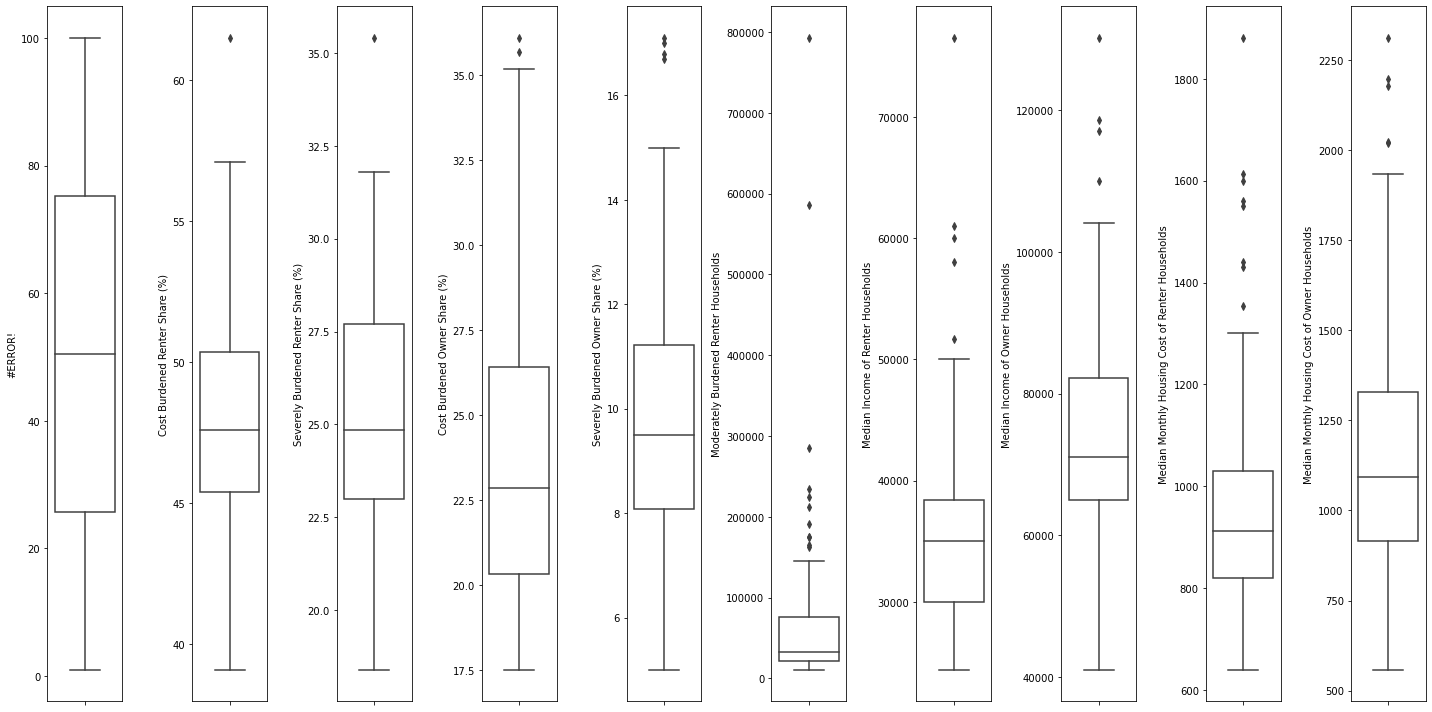


To check pairwise joint distribution of numeric data


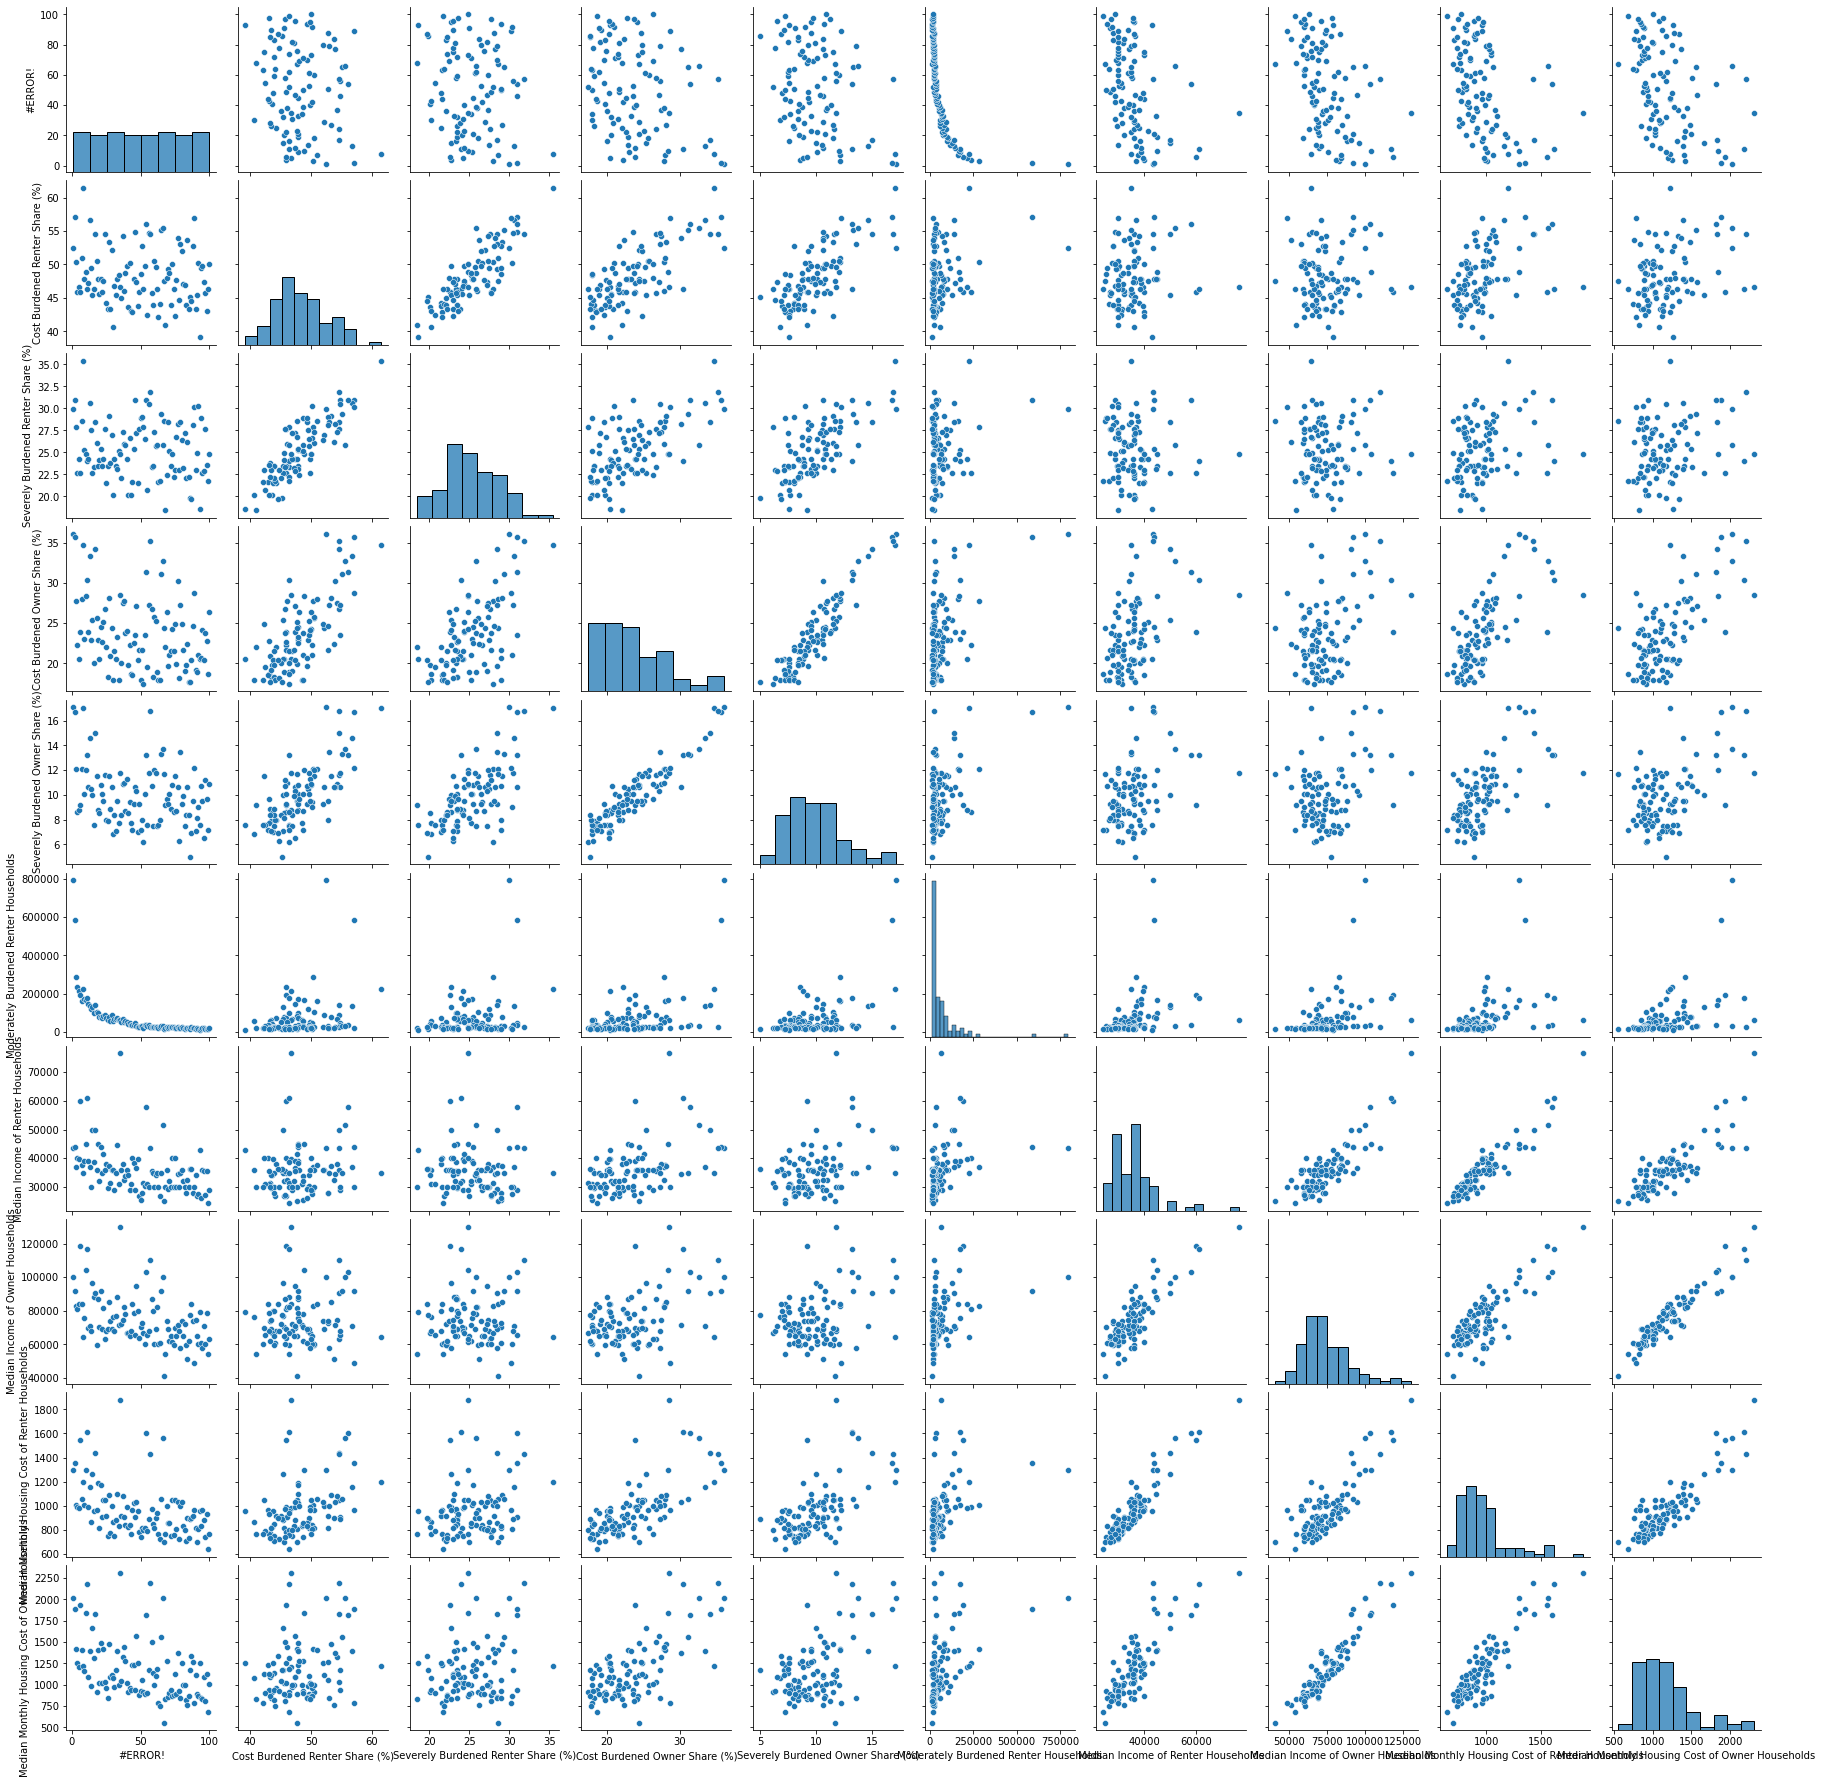

In [44]:
numeric_eda(df)

In [46]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [47]:
profile.to_widgets()

Generate report structure: 100%|██████████| 1/1 [00:07<00:00,  7.47s/it]


# Saving the Cleaned Data

In [48]:
profile.to_file('housing_cost_burden.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 33.86it/s]


In [49]:
df.to_csv(r'C:\Users\mohit\OneDrive\Desktop\omdena-texas-homelessness\src\tasks\task-2-EDA\cleaned_datasets\Final_HIC_By_LHC_2018.csv')